                                    """""""""""""""""""""""""""""""""""""""
                                        PREDICTING PRICE OF USED CARS
                                    """""""""""""""""""""""""""""""""""""""

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
# Setting dimensions of the plot
sns.set(rc={"figure.figsize":(11.7, 8.27)})    

# Change number of decimal places
pd.set_option("display.float_format", lambda x: "%.3f" %x)

# To display max no. of rows & columns
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

In [117]:
cars_df = pd.read_csv("cars_data.csv")

#Copy
cars_df1 = cars_df.copy()

 ## Looking in to the data

In [118]:
#Data structure
cars_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [119]:
#Data summary
cars_df1.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [120]:
cars_df1.describe(include = "O")

,dateCrawled,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
count,50001,50001,50001,50001,50001,44813,47177,47243,45498,50001,40285,50001,50001
unique,12039,38766,2,2,2,8,2,248,7,40,2,75,10413
top,3/4/2016 16:57,BMW_318i,private,offer,test,limousine,manual,golf,petrol,volkswagen,no,3/4/2016 0:00,6/4/2016 5:46
freq,15,90,49999,49998,25869,13041,36732,3972,30214,10646,35337,1976,107


In [121]:
cars_df1.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')

In [122]:
cars_df1.head(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18
5,2/4/2016 12:51,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,offer,988,test,limousine,1995,manual,90,passat,150000,2,petrol,volkswagen,no,2/4/2016 0:00,26826,2/4/2016 12:51
6,3/4/2016 11:06,Opel_astra,private,offer,400,test,station wagon,1996,manual,0,astra,150000,5,petrol,opel,NaN,3/4/2016 0:00,56422,6/4/2016 16:47
7,24/03/2016 15:52,Mercedes_Benz_CLK_Coupe_200,private,offer,1399,test,coupe,1997,manual,136,clk,150000,11,petrol,mercedes_benz,no,24/03/2016 0:00,13353,27/03/2016 12:45
8,28/03/2016 14:40,Vectra_C_Caravan_1_8_Edition_Facelift_m_AHK_In...,private,offer,4680,test,station wagon,2005,manual,122,vectra,150000,12,petrol,opel,no,28/03/2016 0:00,28307,6/4/2016 18:19
9,5/4/2016 11:38,Skoda_Octavia_2.0_TDI_DSG_Elegance,private,offer,8340,test,limousine,2005,automatic,140,octavia,125000,4,diesel,skoda,no,5/4/2016 0:00,16761,5/4/2016 11:38


## DATA CLEANING

In [123]:
#DROPPING UNWANTED COLUMNS
col = ["name", "dateCrawled", "dateCreated", "postalCode", "lastSeen"]
cars_df1 = cars_df1.drop(columns = col, axis = 1)

In [124]:
cars_df1.shape

(50001, 14)

In [125]:
#REMOVE DUPLICATE RECORDS
cars_df1.drop_duplicates(keep = "first", inplace = True)
cars_df1.shape # (49531, 14)
# (Removed 470 duplicate records)

(49531, 14)

In [126]:
#No. of missing values in each column
cars_df1.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

### CHECKING SIGNIFICANCE OF EACH VARIABLE BEFORE FURTHER CLEANING

#### REMOVING OUTLERS AND NULL VALUES

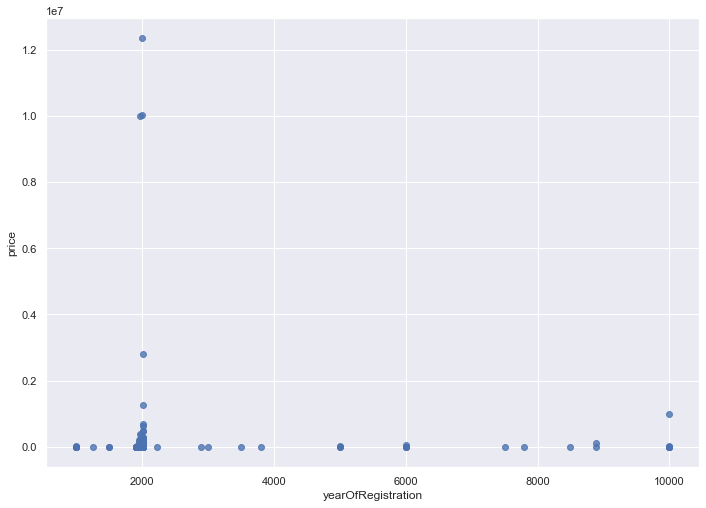

In [127]:
# Variable - "yearOfRegistration"
min(cars_df1["yearOfRegistration"]) #1000
max(cars_df1["yearOfRegistration"]) #9999
# Contains plenty of Outliers
yearwise_count = cars_df1["yearOfRegistration"].value_counts().sort_index()
sum(cars_df1["yearOfRegistration"] > 2019) # 24
sum(cars_df1["yearOfRegistration"] < 1950) # 38
sns.regplot(x = "yearOfRegistration", y = "price", scatter = True, fit_reg = False, data = cars_df1)
# (WORKING RANGE = 1950 - 2019)

In [128]:
#yearwise_count

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

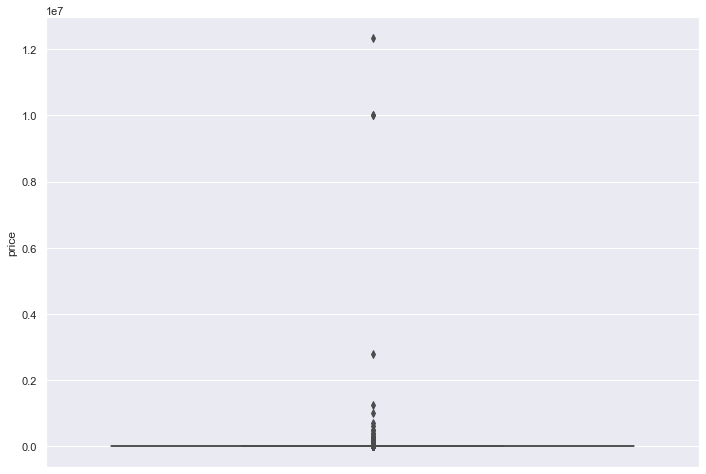

In [129]:
# Variable - "price"
min(cars_df1["price"]) #0
max(cars_df1["price"]) #12345678
price_count = cars_df1["price"].value_counts().sort_index()
#sns.distplot(cars_df1["price"])
sns.boxplot(y = cars_df1["price"])
sum(cars_df1["price"] > 150000) # 34
sum(cars_df1["price"] < 100) #1748
cars_df1["price"].describe()
# (WORKING RANGE = 100 - 150000)


In [130]:
price_count

0           1415
1            172
2              1
3              1
5              4
            ... 
1250000        1
2795000        1
9999999        1
10010011       1
12345678       1
Name: price, Length: 2393, dtype: int64

5565

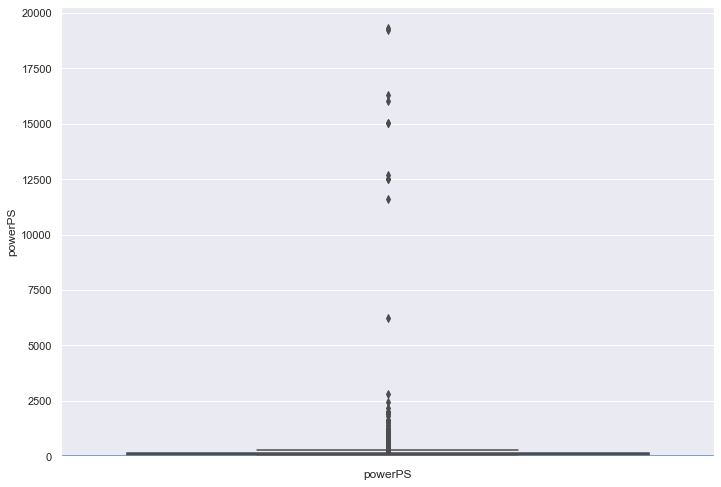

In [131]:
# Variable - "powerPS"
min(cars_df1["powerPS"])
max(cars_df1["powerPS"])
power_count = cars_df1["powerPS"].value_counts().sort_index()
sns.distplot(cars_df1["powerPS"])
cars_df1["powerPS"].describe()
sns.boxplot(y = cars_df1["powerPS"])
#sns.regplot(x = "powerPS", y = "price", scatter = True, fit_reg = False, data = cars_df1)
sum(cars_df1["powerPS"] > 500) #115
sum(cars_df1["powerPS"] < 10) #5565
# (WORKING RANGE = 10 - 500)

In [132]:
power_count

0        5533
1           3
2           2
3           2
4           4
5          17
6           2
7           1
9           1
10          2
11          4
12          6
13          1
14          6
15          3
16          1
18          9
19          2
20          1
22          1
23          3
24          5
26         46
27          5
29          2
30          7
31          1
32          2
33          5
34         29
35          3
36          1
37         11
38          4
39         18
40         39
41         51
42          1
43         24
44         65
45        388
46          5
47          4
48         12
49          2
50        580
51          8
52         41
53         27
54        755
55        285
56         34
57         19
58        488
59         41
60       2149
61        151
62         15
63         53
64        212
65        300
66         22
67         55
68        345
69        482
70        137
71        185
72         73
73         90
74         46
75       3229
76    

In [133]:
"""""""""""""""""""""""""""""""""""""""
    Working Range of Data 
"""""""""""""""""""""""""""""""""""""""
cars_df1 = cars_df1[
         (cars_df1.yearOfRegistration <= 2019)
       & (cars_df1.yearOfRegistration >= 1950)
       & (cars_df1.price <= 150000)
       & (cars_df1.price >= 100)
       & (cars_df1.powerPS <= 500)
       & (cars_df1.powerPS >= 10)]

In [134]:
cars_df1.shape
# ~6700 records are dropped

(42772, 14)

In [135]:
#Further variable simplification
# Combining monthOfRegistration & yearOfRegistration

cars_df1["monthOfRegistration"] /= 12
#Creating 'Age' by adding yearOfRegistration & monthOfRegistration
cars_df1['Age'] = (2019 - cars_df1['yearOfRegistration']) + cars_df1['monthOfRegistration']
cars_df1['Age'] = round(cars_df1['Age'], 2)
cars_df1['Age'].describe()

count   42772.000
mean       15.873
std         7.093
min         1.000
25%        11.330
50%        15.830
75%        20.170
max        68.750
Name: Age, dtype: float64

In [136]:
#Dropping monthOfRegistration & yearOfRegistration as these already manipulated above
cars_df1 = cars_df1.drop(columns = ['yearOfRegistration', 'monthOfRegistration'], axis = 1)

In [137]:
cars_df1.shape

(42772, 13)

## VISUALIZING THE IMPROVED VARIABLES

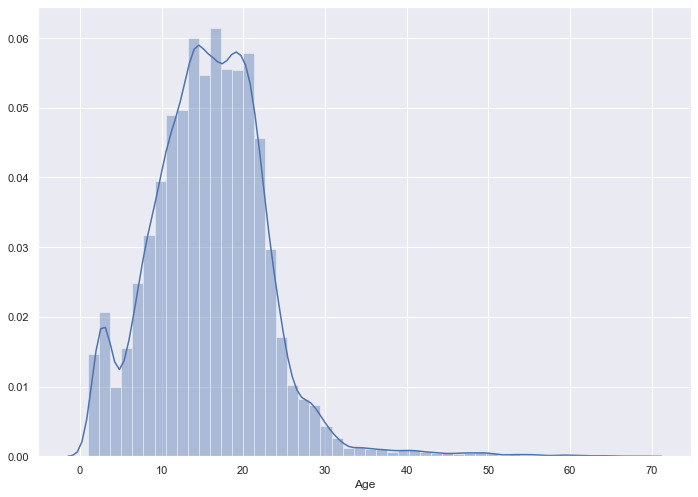

In [138]:
# VISUALIZING PARAMETERS

# Age
sns.distplot(cars_df1['Age'])

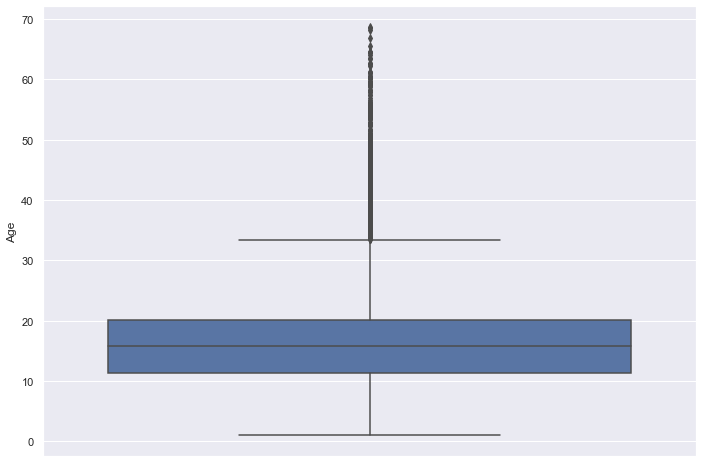

In [139]:
sns.boxplot(y = cars_df1['Age'])

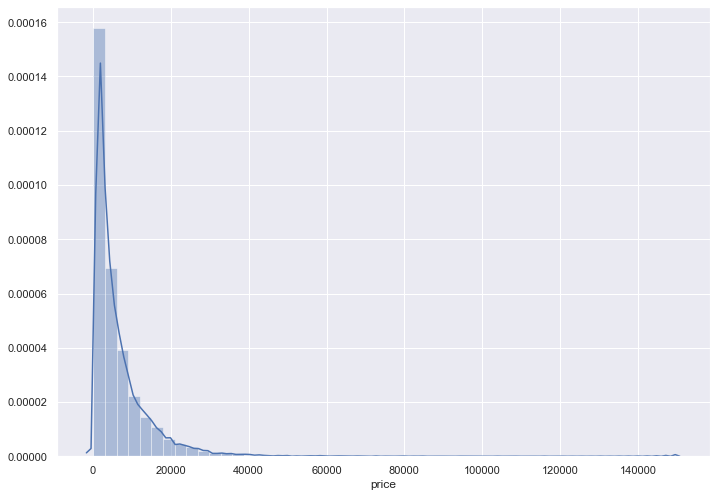

In [140]:
# price
sns.distplot(cars_df1['price'])

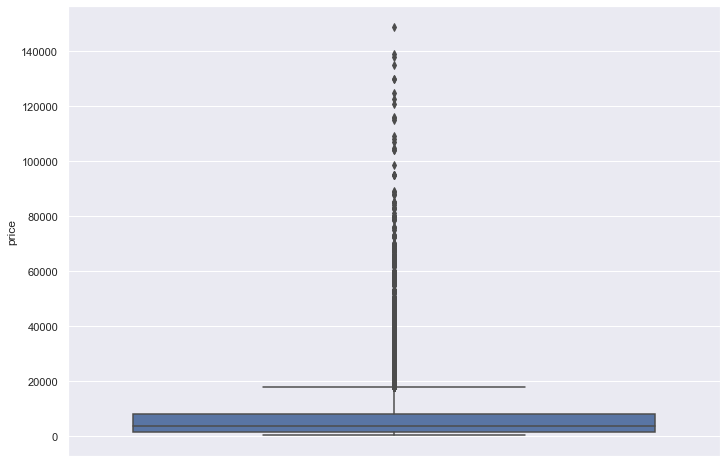

In [141]:
sns.boxplot(y = cars_df1['price'])

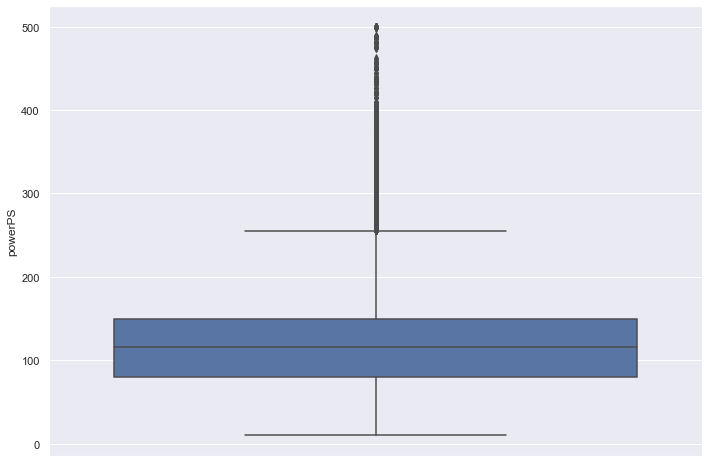

In [142]:
# powerPS
#sns.distplot(cars_df1['powerPS'])
sns.boxplot(y = cars_df1['powerPS'])

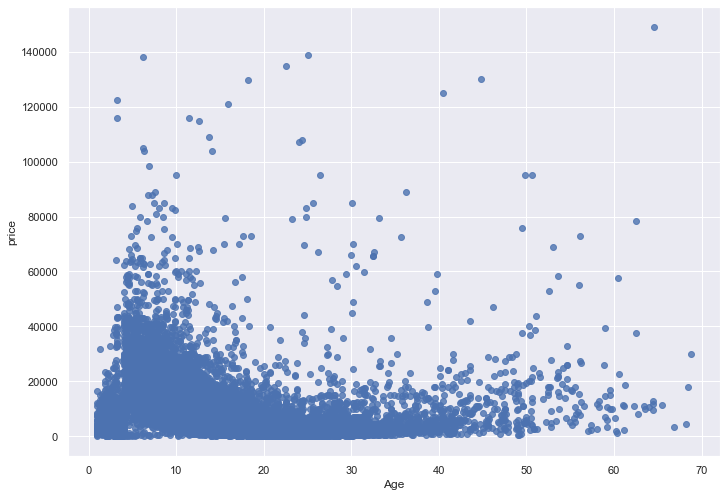

In [143]:
# Age vs price
sns.regplot(x = 'Age', y = 'price', scatter = True, fit_reg = False, data = cars_df1)
# (cars_df1 priced higher are newer)
# (With increase in age, price decreases)
# However some cars_df1 are priced higher with increase in age

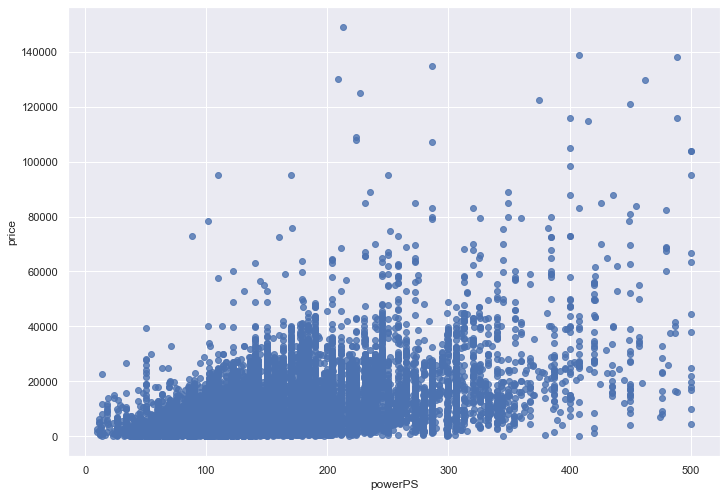

In [144]:
# powerPS vs price
sns.regplot(x = 'powerPS', y = 'price', scatter = True, fit_reg = False, data = cars_df1)

## Dealing with Categorical variables

### Identifying INSIGNIFICANT VARIABLES

In [145]:
# Variable - Seller
cars_df1['seller'].value_counts()

private       42771
commercial        1
Name: seller, dtype: int64

In [146]:
pd.crosstab(cars_df1['seller'], columns = 'count', normalize = True)

col_0,count
seller,
commercial,0.000
private,1.000


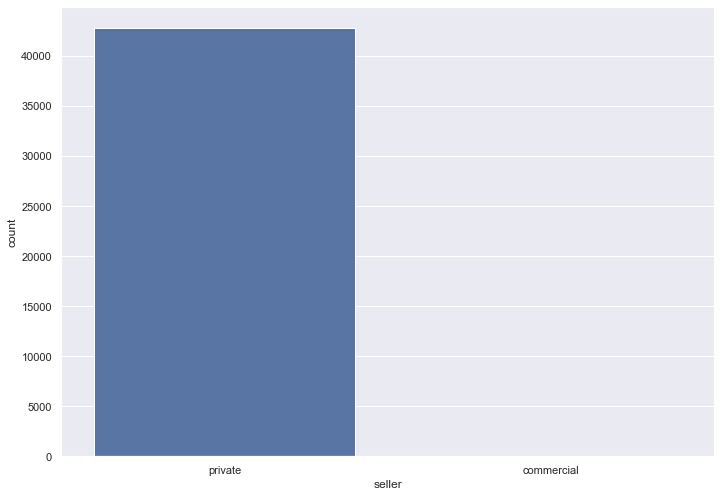

In [147]:
sns.countplot(x = 'seller', data = cars_df1)
# Fewer cars_df1 have 'commercial' => Insignificant

In [148]:
# Variable - offerType
cars_df1['offerType'].value_counts()

offer    42772
Name: offerType, dtype: int64

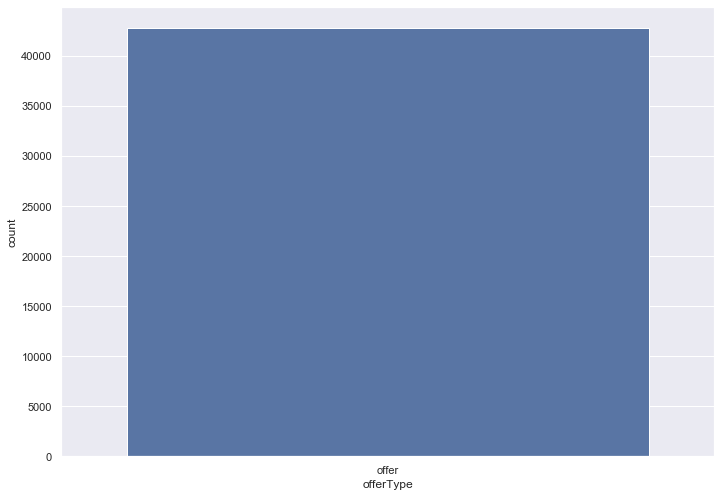

In [149]:
sns.countplot(x = 'offerType', data = cars_df1)
# All cars_df1 have 'offer' => Insignificant

In [150]:
# Variable - abtest
cars_df1['abtest'].value_counts()

test       22128
control    20644
Name: abtest, dtype: int64

In [151]:
pd.crosstab(cars_df1['abtest'], columns = 'count', normalize = True)

col_0,count
abtest,
control,0.483
test,0.517


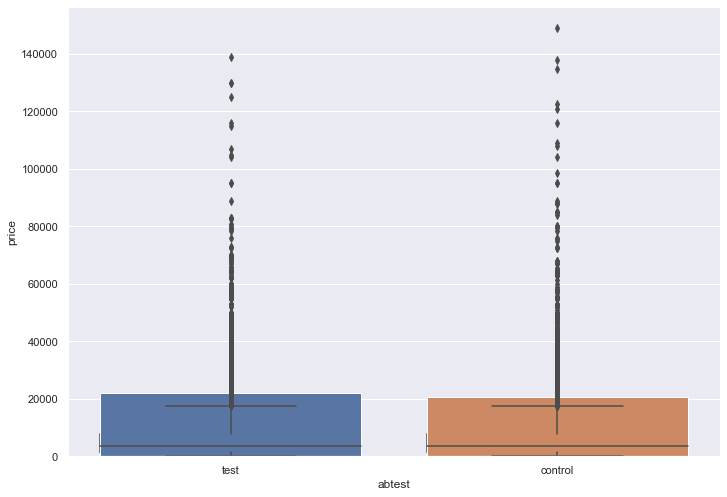

In [152]:
sns.countplot(x = 'abtest', data = cars_df1)
# Equally Distributed
sns.boxplot(x = 'abtest', y = 'price', data = cars_df1)
#For every price value there is almost 50 - 50 distribution
# Does not affect price => Insignificant

In [153]:
# Variable vehicleType
cars_df1['vehicleType'].value_counts()

limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: vehicleType, dtype: int64

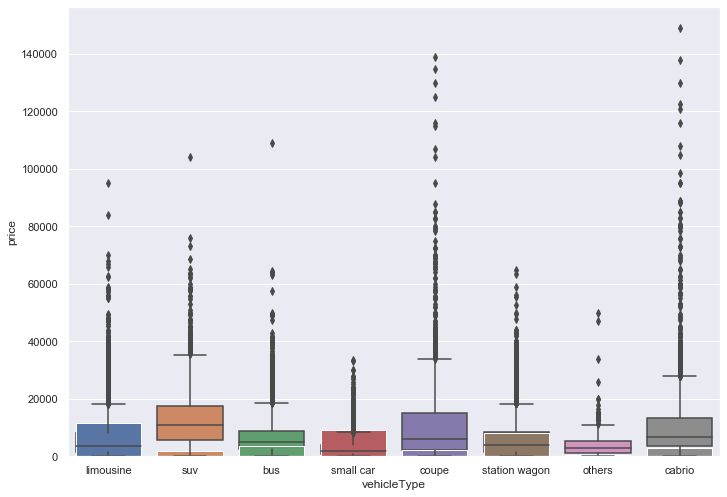

In [154]:
pd.crosstab(cars_df1['vehicleType'], columns = 'count', normalize = True)
sns.countplot(x = 'vehicleType', data = cars_df1)
sns.boxplot(x = 'vehicleType', y = 'price', data = cars_df1)
# 8 types - limousine, small car, station wagon, bus, cabrio, coupe, suv, others  
# limousine, small cars_df1 and station wagons max freq
# vehicle types affect price

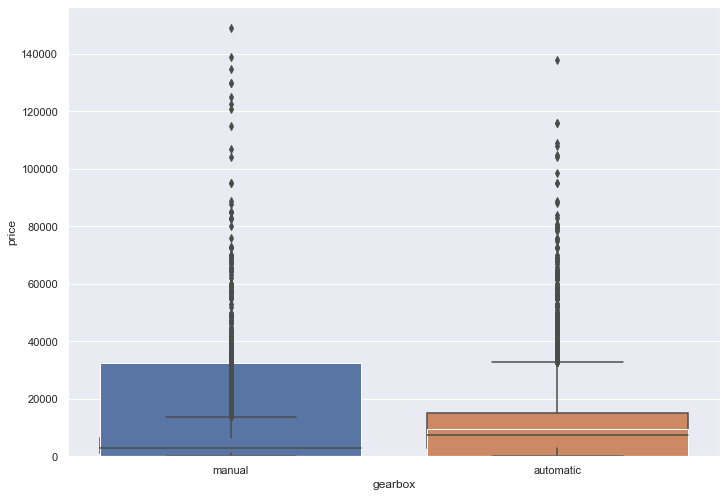

In [155]:
# Variable - gearbox
cars_df1['gearbox'].value_counts()
pd.crosstab(cars_df1['gearbox'], columns = 'count', normalize = True)
sns.countplot(x = 'gearbox', data = cars_df1)
sns.boxplot(x = 'gearbox', y = 'price', data = cars_df1)
# gearbox affects price

In [156]:
# Variable - model
cars_df1['model'].value_counts()
pd.crosstab(cars_df1['model'], columns = 'count', normalize = True)
#sns.countplot(x = 'model', data = cars_df1)
#sns.boxplot(x = 'model', y = 'price', data = cars_df1)
# cars_df1 are distributed over many models
# Considered in modelling

col_0,count
model,
100,0.001
145,0.000
147,0.001
156,0.002
159,0.000
1_reihe,0.004
1er,0.013
200,0.000
2_reihe,0.015


count    42772.000
mean    125815.253
std      39078.120
min       5000.000
25%     100000.000
50%     150000.000
75%     150000.000
max     150000.000
Name: kilometer, dtype: float64

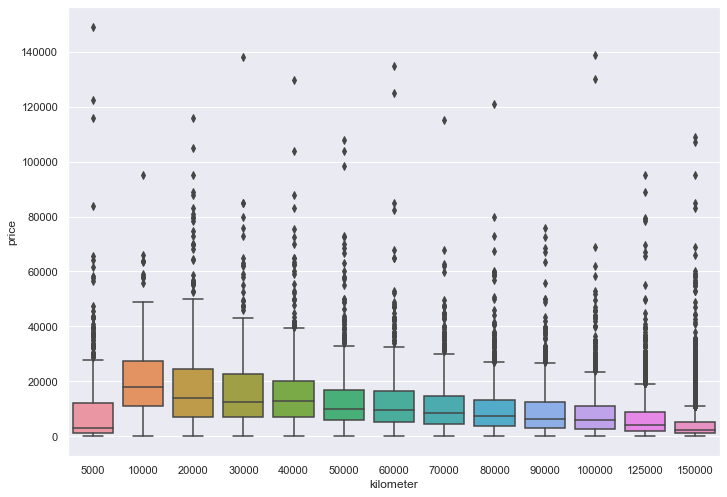

In [157]:
# Variable - kilometer
cars_df1['kilometer'].value_counts()
pd.crosstab(cars_df1['kilometer'], columns = 'count', normalize = True)
sns.boxplot(x = 'kilometer', y = 'price', data = cars_df1)
cars_df1['kilometer'].describe()
#sns.distplot(cars_df1['kilometer'], bins = 8, kde = False)
#sns.regplot(x= 'kilometer', y = 'price', scatter = True, fit_reg = False, data = cars_df1)
# Considered in modelling

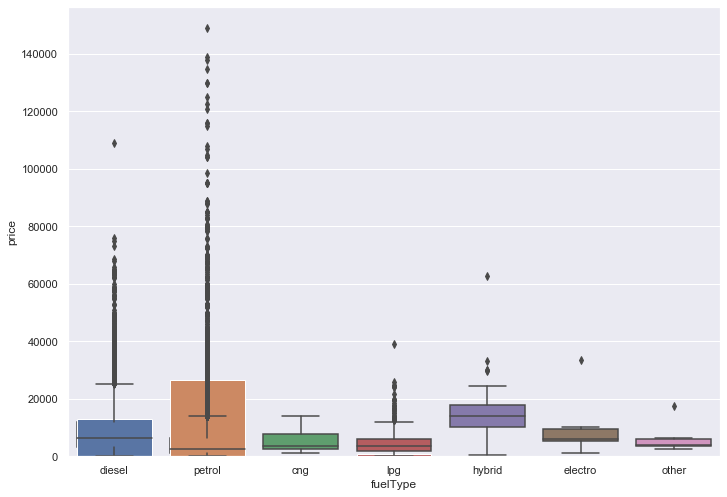

In [158]:
# Variable fuelType
cars_df1['fuelType'].value_counts()
pd.crosstab(cars_df1['fuelType'], columns = 'count', normalize = True)
sns.countplot(x = 'fuelType', data = cars_df1)
sns.boxplot(x = 'fuelType', y = 'price', data = cars_df1)
# fuelType affects price

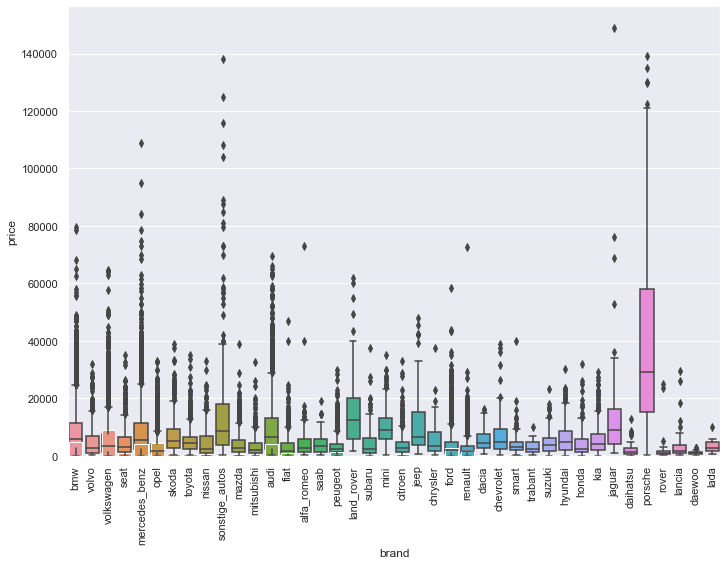

In [159]:
# Variable brand
cars_df1['brand'].value_counts()
pd.crosstab(cars_df1['brand'], columns = 'count', normalize = True)
sns.countplot(x = 'brand', data = cars_df1)
sns.boxplot(x = 'brand', y = 'price', data = cars_df1)
plt.xticks(rotation=90)
plt.show()
#cars_df1 are distributed over many brands
# Considered for modelling

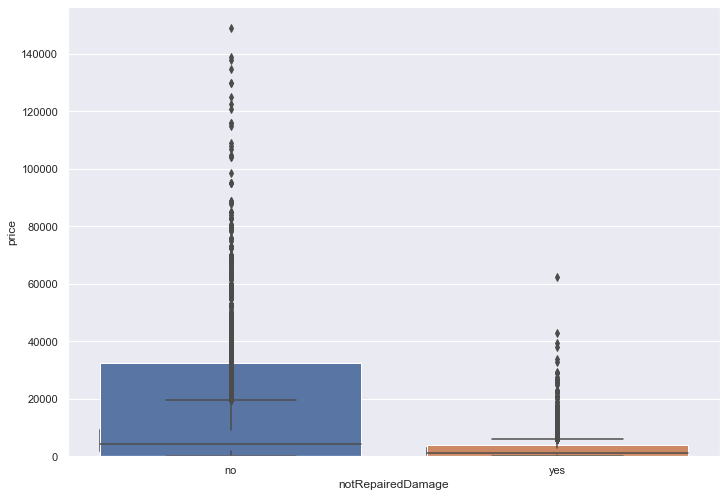

In [160]:
# Variable notRepairedDamage
# yes - car is damaged but not repaired
# no - car is damaged but repaired
cars_df1['notRepairedDamage'].value_counts()
pd.crosstab(cars_df1['notRepairedDamage'], columns = 'count', normalize = True)
sns.countplot(x = 'notRepairedDamage', data = cars_df1)
sns.boxplot(x = 'notRepairedDamage', y = 'price', data = cars_df1)
#cars_df1 that require damage to be repaired fall under lower prize range


In [161]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
REMOVING INSIGNIFICANT VARIABLES: seller, abtest & offerType
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
col = ['seller', 'abtest', 'offerType']
cars_df1 = cars_df1.drop(columns = col, axis = 1)
cars_df1_copy = cars_df1.copy()

In [162]:
cars_df1_copy.columns

Index(['price', 'vehicleType', 'gearbox', 'powerPS', 'model', 'kilometer',
       'fuelType', 'brand', 'notRepairedDamage', 'Age'],
      dtype='object')

In [163]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
CORRELATION
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
cars_df1_select1 = cars_df1.select_dtypes(exclude = [object])
correlation = cars_df1_select1.corr()
round(correlation, 3)
cars_df1_select1.corr().loc[:, 'price'].abs().sort_values(ascending = False)[1:]

powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

## LINEAR REGRESSION & RANDOM FOREST MODELLING

### APPROACH 1: OMITTING MISSING VALUES

In [109]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
(1) OMITTING MISSING VALUES
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
cars_df1_omit = cars_df1.dropna(axis = 0)
# (Dropped around 10000 rows)

# Converting categorical variables to dummy variables
cars_df1_omit = pd.get_dummies(cars_df1_omit, drop_first = True)
cars_df1_omit.shape

(32884, 301)

In [110]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
IMPORTING NECESSARY LIBRARIES
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

(23018, 300) (9866, 300) (23018,) (9866,)


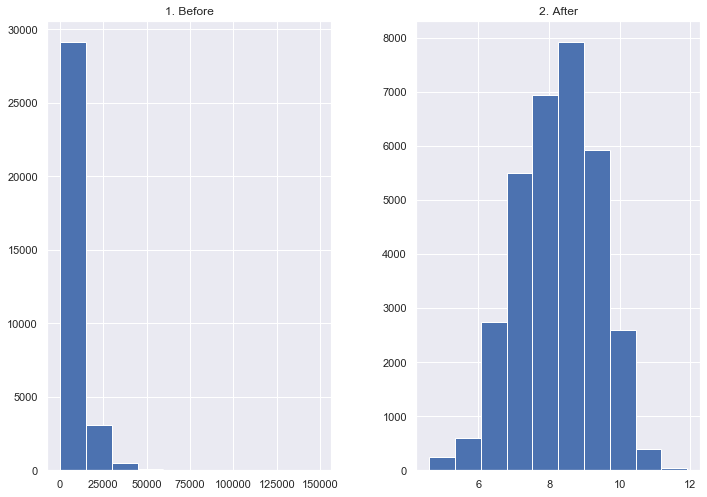

In [111]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
MODEL BUILDING WITH OMITTED DATA
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
#Seperating input and output features
x1 = cars_df1_omit.drop(['price'], axis = 'columns', inplace = False)
y1 = cars_df1_omit['price']

# Plotting the variable price
prices = pd.DataFrame({"1. Before": y1, "2. After": np.log(y1)})
prices.hist()
# Transformin prices to Logarithmic
y1 = np.log(y1)

#Splitting data in to test and train
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.3, random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


In [112]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
BASELINE MODEL FOR OMITTED DATA
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"""
We are making a base model by using test data mean value
This is to set a benchmark and to compare with our regression model
"""

# Finding the mean for test data value
base_pred = np.mean(y_test)
print(base_pred)

# Repeating the same value till length of test data
base_pred = np.repeat(base_pred, len(y_test))

# Finding RMSE Root Mean Square Error
base_root_mean_square_error1 = np.sqrt(mean_squared_error(y_test, base_pred))
print(base_root_mean_square_error1)

8.249615787653337
1.1274483657478247


In [113]:
#"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
#             LINEAR REGRESSION WITH OMITTED DATA
#"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

# Setting intercept as true
lgr = LinearRegression(fit_intercept = True)

# Model
model_lin1 = lgr.fit(X_train, y_train)

# Predicting model on test set
cars_df1_predictions_lin1 = lgr.predict(X_test)

# Computing MSE and RMSE
lin_mse1 = mean_squared_error(y_test, cars_df1_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

# R Squared Value
r2_lin_test1 = model_lin1.score(X_test, y_test)
r2_lin_train1 = model_lin1.score(X_train, y_train)
print(r2_lin_test1, r2_lin_train1)

0.5455481266513859
0.7658615091649228 0.7800936978183916


In [114]:
#"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
#             RANDOM FOREST WITH OMITTED DATA
#"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

#Model Parameters
rf = RandomForestRegressor(n_estimators = 100, max_features = 'auto',
                           max_depth = 100, min_samples_split = 10,
                           min_samples_leaf = 4, random_state = 1)

# Model
model_rf1 = rf.fit(X_train, y_train)

# Predicting model on test set
cars_df1_predictions_rf1 = rf.predict(X_test)

# Computing MSE and RMSE
rf_mse1 = mean_squared_error(y_test, cars_df1_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)

# R Squared Value
r2_rf_test1 = model_rf1.score(X_test, y_test)
r2_rf_train1 = model_rf1.score(X_train, y_train)
print(r2_rf_test1, r2_rf_train1)

0.436073731962631
0.8504017440877062 0.9202494705146291


### APPROACH 2: IMPUTING MISSING VALUES

(29940, 303) (12832, 303) (29940,) (12832,)


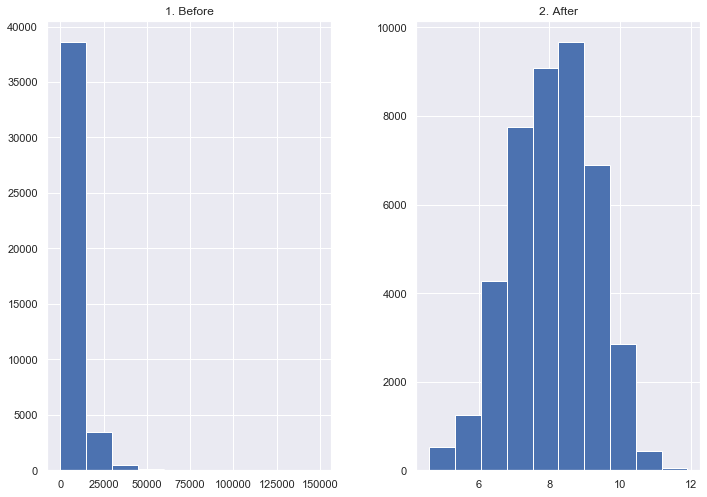

In [115]:

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
MODEL BUILDING WITH IMPUTED DATA
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
#imputing float and objct types
cars_df1_imputed = cars_df1.apply(lambda x : x.fillna(x.median()) \
                          if x.dtype == 'float' else \
                          x.fillna(x.value_counts().index[0]))
cars_df1_imputed.isnull().sum()

# Converting categorical variables to dummy variables
cars_df1_imputed = pd.get_dummies(cars_df1_imputed, drop_first = True)

# Seperating input and output features
x2 = cars_df1_imputed.drop(['price'], axis = 'columns', inplace = False)
y2 = cars_df1_imputed['price']

# Plotting the variable price
prices = pd.DataFrame({"1. Before": y2, "2. After": np.log(y2)})
prices.hist()

# Transforming price as a log value
y2 = np.log(y2)

#Splitting data in to test and train
X_train1, X_test1, y_train1, y_test1 = train_test_split(x2, y2, test_size = 0.3, random_state = 3)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)


In [116]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
BASELINE MODEL FOR IMPUTED DATA
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"""
We are making a base model by using test data mean value
This is to set a benchmark and to compare with our regression model
"""

# Finding the mean for test data value
base_pred = np.mean(y_test1)
print(base_pred)

# Repeating the same value till length of test data
base_pred = np.repeat(base_pred, len(y_test1))

# Finding RMSE Root Mean Square Error
base_root_mean_square_error2 = np.sqrt(mean_squared_error(y_test1, base_pred))
print(base_root_mean_square_error2)

8.068391740519193
1.1884349112889792


In [56]:
#"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
#             LINEAR REGRESSION WITH IMPUTED DATA
#"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

# Setting intercept as true
lgr2 = LinearRegression(fit_intercept = True)

# Model
model_lin2 = lgr2.fit(X_train1, y_train1)

# Predicting model on test set
cars_df1_predictions_lin2 = lgr2.predict(X_test1)

# Computing MSE and RMSE
lin_mse2 = mean_squared_error(y_test1, cars_df1_predictions_lin2)
lin_rmse2 = np.sqrt(lin_mse2)
print(lin_rmse2)

# R Squared Value
r2_lin_test2 = model_lin2.score(X_test1, y_test1)
r2_lin_train2 = model_lin2.score(X_train1, y_train1)
print(r2_lin_test2, r2_lin_train2)

0.6483956449231323
0.702333900863116 0.7071658736894363


In [57]:
#"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
#             RANDOM FOREST WITH IMPUTED DATA
#"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

#Model Parameters
rf2 = RandomForestRegressor(n_estimators = 100, max_features = 'auto',
                           max_depth = 100, min_samples_split = 10,
                           min_samples_leaf = 4, random_state = 1)

# Model
model_rf2 = rf2.fit(X_train1, y_train1)

# Predicting model on test set
cars_df1_predictions_rf2 = rf2.predict(X_test1)

# Computing MSE and RMSE
rf_mse2 = mean_squared_error(y_test1, cars_df1_predictions_rf2)
rf_rmse2 = np.sqrt(rf_mse2)
print(rf_rmse2)

# R Squared Value
r2_rf_test2 = model_rf2.score(X_test1, y_test1)
r2_rf_train2 = model_rf2.score(X_train1, y_train1)
print(r2_rf_test2, r2_rf_train2)

0.494316830858078
0.8269944666838189 0.9024289705830797


## INFERENCE

In [58]:
print(
f"""
APPROACH 1: OMITING MISSING VALUES:
R Squared Value for train from Linear Regression = {r2_lin_train1}
R Squared Value for test from Linear Regression = {r2_lin_test1}
R Squared Value for train from Random Forests = {r2_rf_train1}
R Squared Value for test from Random Forests = {r2_rf_test1}
Base RMSE of model built = {base_root_mean_square_error1}
RMSE from Linear Regression = {lin_rmse1}
RMSE from Random Forest = {rf_rmse1}

APPROACH 2: IMPUTING MISSING VALUES:
R Squared Value for train from Linear Regression = {r2_lin_train2}
R Squared Value for test from Linear Regression = {r2_lin_test2}
R Squared Value for train from Random Forests = {r2_rf_train2}
R Squared Value for test from Random Forests = {r2_rf_test2}
Base RMSE of model built = {base_root_mean_square_error2}
RMSE from Linear Regression = {lin_rmse2}
RMSE from Random Forest = {rf_rmse2}
""")


APPROACH 1: OMITING MISSING VALUES:
R Squared Value for train from Linear Regression = 0.7800936978183916
R Squared Value for test from Linear Regression = 0.7658615091649228
R Squared Value for train from Random Forests = 0.9202494705146291
R Squared Value for test from Random Forests = 0.8504017440877062
Base RMSE of model built = 1.1274483657478247
RMSE from Linear Regression = 0.5455481266513859
RMSE from Random Forest = 0.436073731962631

APPROACH 2: IMPUTING MISSING VALUES:
R Squared Value for train from Linear Regression = 0.7071658736894363
R Squared Value for test from Linear Regression = 0.702333900863116
R Squared Value for train from Random Forests = 0.9024289705830797
R Squared Value for test from Random Forests = 0.8269944666838189
Base RMSE of model built = 1.1884349112889792
RMSE from Linear Regression = 0.6483956449231323
RMSE from Random Forest = 0.494316830858078



## REGRESSION DIAGONOSTICS - RESIDUAL PLOT ANALYSIS

count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64

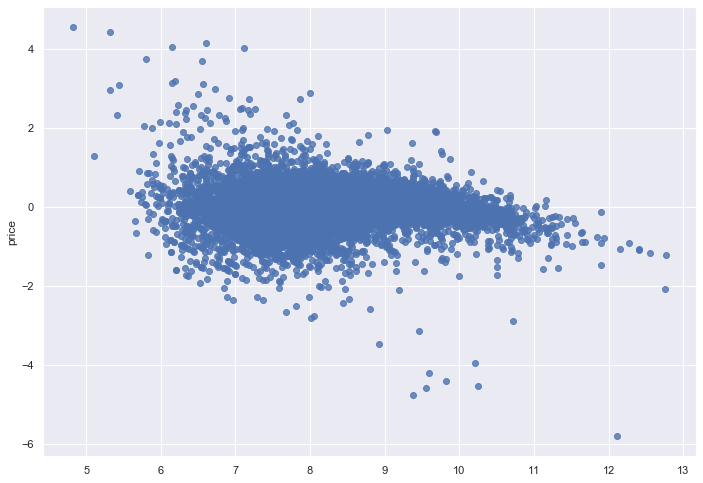

In [125]:
# Linear Regression Model - Omitting Missing Values
residuals1 = y_test - cars_df1_predictions_lin1
sns.regplot(x = cars_df1_predictions_lin1, y = residuals1, scatter = True, fit_reg = False, data = cars_df1)
residuals1.describe()

count   12832.000
mean       -0.014
std         0.494
min        -5.537
25%        -0.224
50%         0.023
75%         0.243
max         2.854
Name: price, dtype: float64

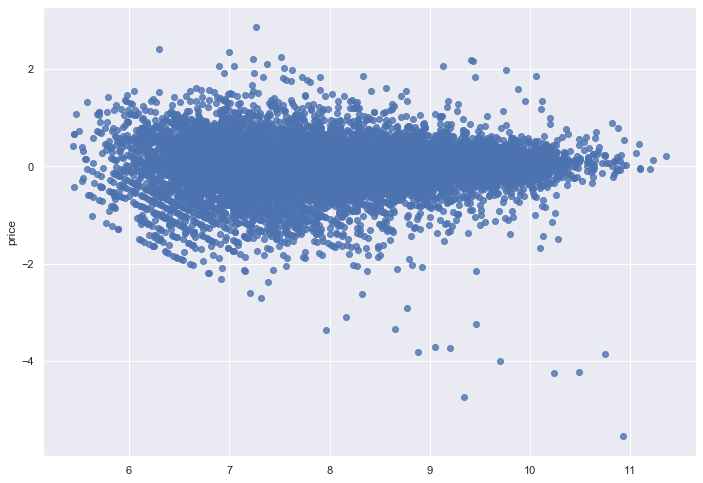

In [127]:
# Random Forest Model - Imputing Missing Values
residuals2 = y_test1 - cars_df1_predictions_rf2
sns.regplot(x = cars_df1_predictions_rf2, y = residuals2, scatter = True, fit_reg = False, data = cars_df1)
residuals2.describe()

In [1]:
# Interpretation
# Linear Regression model generated better accuracy at lower residual error compared to the Random Forest model.
# The R squared value of Linear regression model test set follows that of train set accurately.